In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance
import bats
import time

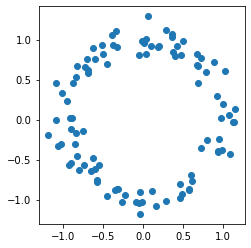

In [2]:
# first, generate a circle
n = 100
X = np.random.normal(size=(n,2))
X = X / np.linalg.norm(X, axis=1).reshape(-1,1)
X = X + np.random.normal(size=(n,2), scale = 0.1 )
fig = plt.scatter(X[:,0], X[:,1])
fig.axes.set_aspect('equal')

In [ ]:
# use bats to compute distances internally
data = bats.DataSet(bats.Matrix(X)) # put into a bats.DataSet
dist = bats.Euclidean()  # distance we would like to use
F = bats.RipsFiltration(data, dist, np.inf, 2) # generate a RipsFiltration

R = bats.reduce(F, bats.F2()) # reduce with F2 coefficients
ps = []
for d in range(R.maxdim()):
    ps.extend(R.persistence_pairs(d))

fig, ax = bats.persistence_diagram(ps, tmax = 2.0)

In [ ]:
F, imap = bats.rips_filtration_extension(data, dist, np.inf, 2)

In [ ]:
fig = plt.scatter(X[:,0], X[:,1])
fig.axes.set_aspect('equal')

## Updating Rips Filtration's Persistence

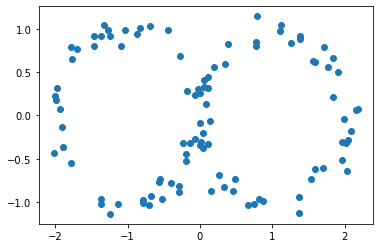

In [3]:
# first, generate a new noisy date
n = 100
Y = np.random.normal(size=(n,2))
Y = Y / np.linalg.norm(Y, axis=1).reshape(-1,1)
Y = Y + np.random.normal(size=(n,2), scale = 0.1 )

Y[:50,0] = Y[:50,0] - 1
Y[50:,0] = Y[50:,0] + 1

fig = plt.scatter(Y[:,0], Y[:,1])

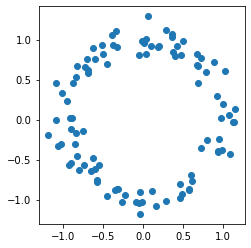

In [4]:
fig = plt.scatter(X[:,0], X[:,1])
fig.axes.set_aspect('equal')

#### Option 1 Rebuild

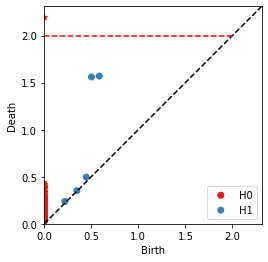

In [5]:
# use bats to compute distances internally
data_Y = bats.DataSet(bats.Matrix(Y)) # put into a bats.DataSet
dist = bats.Euclidean()  # distance we would like to use
F_Y = bats.RipsFiltration(data_Y, dist, np.inf, 2) # generate a RipsFiltration

R_Y = bats.reduce(F_Y, bats.F2()) # reduce with F2 coefficients
ps = []
for d in range(R_Y.maxdim()):
    ps.extend(R_Y.persistence_pairs(d))

fig, ax = bats.persistence_diagram(ps, tmax = 2.0)

##### Option 2 Updating RFCC

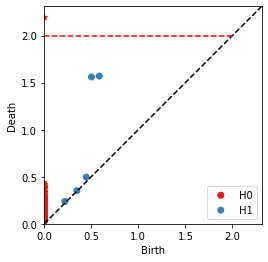

In [6]:
# use bats to compute distances internally
data = bats.DataSet(bats.Matrix(X)) # put into a bats.DataSet
dist = bats.Euclidean()  # distance we would like to use
F_X = bats.RipsFiltration(data, dist, np.inf, 2) # generate a RipsFiltration

R_X = bats.reduce(F_X, bats.F2()) # reduce with F2 coefficients

UI = bats.UpdateInfoFiltration(F_X, F_Y)
# Update
R_X.update_filtration_general(UI)

ps = []
for d in range(R_X.maxdim()):
    ps.extend(R_X.persistence_pairs(d))

fig, ax = bats.persistence_diagram(ps, tmax = 2.0)

In [ ]:
np.linalg.norm(X[ind0]- X[ind1])

In [ ]:
complex_X = F_X.complex()
[ind0, ind1] = complex_X.get_simplex(1, 0)
np.linalg.norm(X[ind0]- X[ind1])

In [ ]:
vals = F_X.vals(1)
vals.length

In [9]:
# We can get the indices of critical cells
ps = R_X.persistence_pairs(1)
for p in ps:
    if p.length() > 0:
        print(p)
        # print(p.birth_ind())
        # the birth index is the index of edges, we want to get the index of its two vertices 
        

1 : (0.493685,1.54676) <422,15959>
1 : (0.553124,1.63996) <480,19218>


## Optimizing Rips

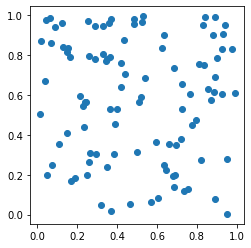

In [7]:
# first, generate a circle
n = 100
# X = np.random.normal(size=(n,2))
X = np.random.rand(100, 2)

# X = X / np.linalg.norm(X, axis=1).reshape(-1,1)
# X = X + np.random.normal(size=(n,2), scale = 0.1 )
fig = plt.scatter(X[:,0], X[:,1])
fig.axes.set_aspect('equal')

# use bats to compute distances internally
data = bats.DataSet(bats.Matrix(X)) # put into a bats.DataSet
dist = bats.Euclidean()  # distance we would like to use

In [13]:
p.birth()

2.946809721048234

In [14]:
F, imap = bats.rips_filtration_extension(data, dist, 1.0 , 2)

In [8]:
lr = 0.1 # persistence penalty

t0 = time.monotonic()
F, imap = bats.rips_filtration_extension(data, dist, 1.0 , 2)
R = bats.reduce(F, bats.F2())
t1 = time.monotonic()
print("initialization: {} sec.".format(t1-t0))
F_old = F

for i in range(10):
    print("iter ", i)
    # Optimize H1 length
    # get 1-dimensional pairs
    t0 = time.monotonic()
    ps = R.persistence_pairs(1)
    t1a = time.monotonic()
    print("\tpairs: {} sec.".format(t1a - t0))
    
    t0b = time.monotonic()
    complex_old = F_old.complex() # complex of filtration
    filtration_vals_old = F_old.vals(1) # filtration vals at dimension 1
    
    # change the posistion of two vertices 
    # that are related to the birth of the persistence pair
    for p in ps:
        if p.length() > 0:
            d = p.dim()
            # get indices of two vertices of the (birth) edge 
            bi = p.birth_ind() # index of birth edge 
            [birth_vertex1_i, birth_vertex2_i] = complex_old.get_simplex(1, bi)
            # Gradient Descent
            grad_div_2 = 2 * (p.death() - p.birth()) * (X[birth_vertex1_i] - X[birth_vertex2_i])
            X[birth_vertex1_i] =  -(lr/ filtration_vals_old[bi]) * (grad_div_2)
            X[birth_vertex2_i] =  (lr/ filtration_vals_old[bi]) * (grad_div_2)

            # get the death index of related edge 
            di = imap[d+1][p.death_ind()] # maps death_ind to the death edge (related to the 2-simplex destroys H1)
            # get index of two vertices of the (birth) edge 
            [death_vertex1_i, death_vertex2_i] = complex_old.get_simplex(1, di)
            # Gradient Descent
            grad_div_2 = X[death_vertex1_i] - X[death_vertex2_i]
            X[death_vertex1_i] =  (lr/ filtration_vals_old[di]) * (grad_div_2)
            X[death_vertex2_i] =  - (lr/ filtration_vals_old[di]) * (grad_div_2)
        
    t1b = time.monotonic()
    print("\tOptimize: {} sec.".format(t1b - t0b))
    
    # extend filtration
    t0c = time.monotonic()
    data = bats.DataSet(bats.Matrix(X)) # put into a bats.DataSet
    F_new, imap = bats.rips_filtration_extension(data, dist, np.inf, 2)
    t1c = time.monotonic()
    print("\textension: {} sec.".format(t1c - t0c))
    
    # Find Updating Information
    t0d = time.monotonic()
    UI = bats.UpdateInfoFiltration(F_old, F_new)
    t1d = time.monotonic()
    print("\tfind updating info: {} sec.".format(t1d - t0d))
    
    # Update persistence
    t0e = time.monotonic()
    R.update_filtration_general(UI)
    t1e = time.monotonic()
    print("\tupdate: {} sec.".format(t1e - t0e))
    
    # Set old Filtration    
    F_old = F_new
    
    t1 = time.monotonic()
    print("All: {}: {} sec.".format(i, t1-t0))

initialization: 24.38040162299876 sec.
iter  0
	pairs: 2.0871251550015586 sec.
	Optimize: 0.27970727200045076 sec.
	extension: 0.7445391609999206 sec.
	find updating info: 2.5340778890004003 sec.
	update: 4.896205689999988 sec.
All: 0: 10.542777070000739 sec.
iter  1
	pairs: 0.010676871999748982 sec.
	Optimize: 0.14661514799990982 sec.
	extension: 0.6924692110005708 sec.
	find updating info: 0.8805153180001071 sec.
	update: 8.081055818000095 sec.
All: 1: 9.839797574999466 sec.
iter  2
	pairs: 0.009380331999636837 sec.
	Optimize: 0.14787012499982666 sec.
	extension: 0.6587839139992866 sec.
	find updating info: 0.4834043949995248 sec.
	update: 2.793680752 sec.
All: 2: 4.130176655000469 sec.
iter  3
	pairs: 0.016829812000651145 sec.
	Optimize: 0.08556314299858059 sec.
	extension: 0.6107135170004767 sec.
	find updating info: 0.48748831099874224 sec.
	update: 2.2953517789992475 sec.
All: 3: 3.546643445000882 sec.
iter  4
	pairs: 0.02069553199908114 sec.
	Optimize: 0.08410351299971808 sec.
	

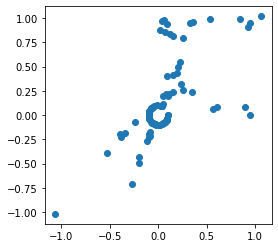

In [9]:
fig = plt.scatter(X[:,0], X[:,1])
fig.axes.set_aspect('equal')

###### Reduce the iteration times 

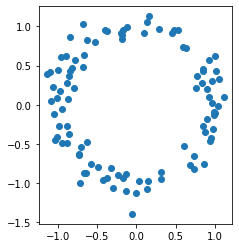

In [12]:
# first, generate a circle
n = 100
X = np.random.normal(size=(n,2))
X = X / np.linalg.norm(X, axis=1).reshape(-1,1)
X = X + np.random.normal(size=(n,2), scale = 0.1 )
fig = plt.scatter(X[:,0], X[:,1])
fig.axes.set_aspect('equal')

# use bats to compute distances internally
data = bats.DataSet(bats.Matrix(X)) # put into a bats.DataSet
dist = bats.Euclidean()  # distance we would like to use

In [13]:
lr = 0.01 # persistence penalty

t0 = time.monotonic()
F, imap = bats.rips_filtration_extension(data, dist, np.inf, 2)
R = bats.reduce(F, bats.F2())
t1 = time.monotonic()
print("initialization: {} sec.".format(t1-t0))
F_old = F

for i in range(5):
    print("\niter", i)
    # Optimize H1 length
    # get 1-dimensional pairs
    t0 = time.monotonic()
    ps = R.persistence_pairs(1)
    t1a = time.monotonic()
    print("\tpairs: {} sec.".format(t1a - t0))
    
    t0b = time.monotonic()
    complex_old = F_old.complex() # complex of filtration
    filtration_vals_old = F_old.vals(1) # filtration vals at dimension 1
    
    # change the posistion of two vertices 
    # that are related to the birth of the persistence pair
    for p in ps:
        if p.length() > 0:
            d = p.dim()
            # get indices of two vertices of the (birth) edge 
            bi = p.birth_ind() # index of birth edge 
            [birth_vertex1_i, birth_vertex2_i] = complex_old.get_simplex(1, bi)
            # Gradient Descent
            grad_div_2 = X[birth_vertex1_i] - X[birth_vertex2_i]
            X[birth_vertex1_i] =  -(lr/ filtration_vals_old[bi]) * (grad_div_2)
            X[birth_vertex2_i] =  (lr/ filtration_vals_old[bi]) * (grad_div_2)

            # get the death index of related edge 
            di = imap[d+1][p.death_ind()] # maps death_ind to the death edge (related to the 2-simplex destroys H1)
            # get index of two vertices of the (birth) edge 
            [death_vertex1_i, death_vertex2_i] = complex_old.get_simplex(1, di)
            # Gradient Descent
            grad_div_2 = X[death_vertex1_i] - X[death_vertex2_i]
            X[death_vertex1_i] =  (lr/ filtration_vals_old[di]) * (grad_div_2)
            X[death_vertex2_i] =  - (lr/ filtration_vals_old[di]) * (grad_div_2)
        
    t1b = time.monotonic()
    print("\tOptimize: {} sec.".format(t1b - t0b))
    
    # extend filtration
    t0c = time.monotonic()
    data = bats.DataSet(bats.Matrix(X)) # put into a bats.DataSet
    F_new, imap = bats.rips_filtration_extension(data, dist, np.inf, 2)
    t1c = time.monotonic()
    print("\textension: {} sec.".format(t1c - t0c))
    
    # Find Updating Information
    t0d = time.monotonic()
    UI = bats.UpdateInfoFiltration(F_old, F_new)
    t1d = time.monotonic()
    print("\tfind updating info: {} sec.".format(t1d - t0d))
    
    # Update persistence
    t0e = time.monotonic()
    R.update_filtration_general(UI)
    t1e = time.monotonic()
    print("\tupdate: {} sec.".format(t1e - t0e))
    
    # Set old Filtration    
    F_old = F_new
    
    t1 = time.monotonic()
    print("All: {} sec.".format(t1-t0))

initialization: 1.0985323549994064 sec.

iter 0
	pairs: 0.03912769500129798 sec.
	Optimize: 0.07083401099953335 sec.
	extension: 0.3210160340004222 sec.
	find updating info: 0.29643755500001134 sec.
	update: 0.5864042869998229 sec.
All: 1.3141384660011681 sec.

iter 1
	pairs: 0.005792431000372744 sec.
	Optimize: 0.06644129300002533 sec.
	extension: 0.2981852000011713 sec.
	find updating info: 0.2563060040010896 sec.
	update: 0.3901425870008097 sec.
All: 1.0389476279997325 sec.

iter 2
	pairs: 0.011511755999890738 sec.
	Optimize: 0.07107589799852576 sec.
	extension: 0.29051917000106187 sec.
	find updating info: 0.2709083259996987 sec.
	update: 0.33358716200018534 sec.
All: 1.0047001459988678 sec.

iter 3
	pairs: 0.01348314200004097 sec.
	Optimize: 0.1305791290014895 sec.
	extension: 0.361353919000976 sec.
	find updating info: 0.2629138989996136 sec.
	update: 0.42791703100010636 sec.
All: 1.2269335069995577 sec.

iter 4
	pairs: 0.013545699001042522 sec.
	Optimize: 0.07509762999870873 sec

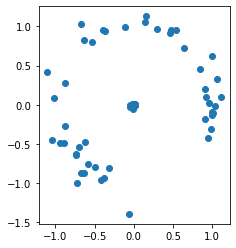

In [14]:
fig = plt.scatter(X[:,0], X[:,1])
fig.axes.set_aspect('equal')

See the H1 now

In [11]:
ps = R.persistence_pairs(1)
for p in ps:
    if p.length() > 0:
        print(p)
   

1 : (0.0185424,0.0250865) <68,64>
1 : (0.0185424,0.0250865) <69,66>
1 : (0.0575777,0.174663) <206,7222>
1 : (0.202981,0.220077) <1343,20667>
1 : (0.612294,0.941056) <2082,47743>
1 : (0.688478,0.818223) <2114,40569>
1 : (0.765501,0.785211) <2159,40244>


Reproducing results in TopologyLayer

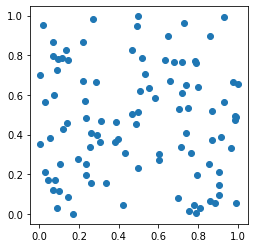

In [28]:
n = 100
X = np.random.rand(n,2)
fig = plt.scatter(X[:,0], X[:,1])
fig.axes.set_aspect('equal')

# use bats to compute distances internally
data = bats.DataSet(bats.Matrix(X)) # put into a bats.DataSet
dist = bats.Euclidean()  # distance we would like to use

initialization: 0.90491128100075 sec.

iter 0
	pairs: 0.00819812600093428 sec.
	Optimize: 0.09105224599989015 sec.
	extension: 0.3771985280000081 sec.
	update: 0.4290218450005341 sec.
All: 0.9058559210006933 sec.

iter 1
	pairs: 0.019189945998732583 sec.
	Optimize: 0.08540593799989438 sec.
	extension: 0.2981734900004085 sec.
	update: 0.34043736800049373 sec.
All: 0.7769296649985336 sec.

iter 2
	pairs: 0.022081952000007732 sec.
	Optimize: 0.09426897499906772 sec.
	extension: 0.28473821799889265 sec.
	update: 0.40313202399920556 sec.
All: 0.8405113099997834 sec.

iter 3
	pairs: 0.022319763998893904 sec.
	Optimize: 0.11156814399873838 sec.
	extension: 0.416607393999584 sec.
	update: 0.3558395689997269 sec.
All: 0.9387497989991971 sec.

iter 4
	pairs: 0.0214558229999966 sec.
	Optimize: 0.09955738600001496 sec.
	extension: 0.43863640800009307 sec.
	update: 0.4287188479993347 sec.
All: 1.020903583999825 sec.

iter 5
	pairs: 0.01900319699961983 sec.
	Optimize: 0.08073850800064974 sec.
	exten

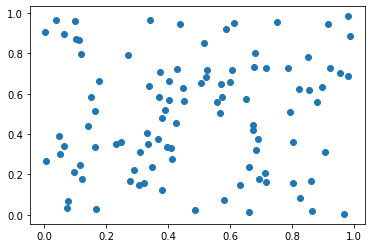

In [31]:
n = 100
X = np.random.rand(n,2)
fig.axes.set_aspect('equal')
fig = plt.scatter(X[:,0], X[:,1])

# use bats to compute distances internally
data = bats.DataSet(bats.Matrix(X)) # put into a bats.DataSet
dist = bats.Euclidean()  # distance we would like to use

lr = 0.001 # persistence penalty

t0 = time.monotonic()
F, imap = bats.rips_filtration_extension(data, dist, np.inf, 2)
R = bats.reduce(F, bats.F2())
t1 = time.monotonic()
print("initialization: {} sec.".format(t1-t0))
F_old = F

for i in range(50):
    print("\niter", i)
    # Optimize H1 length
    # get 1-dimensional pairs
    t0 = time.monotonic()
    ps = R.persistence_pairs(1)
    t1a = time.monotonic()
    print("\tpairs: {} sec.".format(t1a - t0))
    
    t0b = time.monotonic()
    complex_old = F_old.complex() # complex of filtration
    filtration_vals_old = F_old.vals(1) # filtration vals at dimension 1
    
    # change the posistion of two vertices 
    # that are related to the birth of the persistence pair
    for p in ps:
        if p.length() > 0:
            d = p.dim()
            # get indices of two vertices of the (birth) edge 
            bi = p.birth_ind() # index of birth edge 
            [birth_vertex1_i, birth_vertex2_i] = complex_old.get_simplex(1, bi)
            # Gradient Descent
            grad_div_2 = X[birth_vertex1_i] - X[birth_vertex2_i]
            X[birth_vertex1_i] =  -(lr/ filtration_vals_old[bi]) * (grad_div_2)
            X[birth_vertex2_i] =  (lr/ filtration_vals_old[bi]) * (grad_div_2)

            # get the death index of related edge 
            di = imap[d+1][p.death_ind()] # maps death_ind to the death edge (related to the 2-simplex destroys H1)
            # get index of two vertices of the (birth) edge 
            [death_vertex1_i, death_vertex2_i] = complex_old.get_simplex(1, di)
            # Gradient Descent
            grad_div_2 = X[death_vertex1_i] - X[death_vertex2_i]
            X[death_vertex1_i] =  (lr/ filtration_vals_old[di]) * (grad_div_2)
            X[death_vertex2_i] =  -(lr/ filtration_vals_old[di]) * (grad_div_2)
        
    t1b = time.monotonic()
    print("\tOptimize: {} sec.".format(t1b - t0b))
    
    # extend filtration
    t0c = time.monotonic()
    data = bats.DataSet(bats.Matrix(X)) # put into a bats.DataSet
    F_new, imap = bats.rips_filtration_extension(data, dist, np.inf, 2)
    t1c = time.monotonic()
    print("\textension: {} sec.".format(t1c - t0c))
    
    
    # compute persistence
    t0e = time.monotonic()
    R = bats.reduce(F_new, bats.F2())
    t1e = time.monotonic()
    print("\tupdate: {} sec.".format(t1e - t0e))
    
    # Set new Filtration    
    F_old = F_new
    
    t1 = time.monotonic()
    print("All: {} sec.".format(t1-t0))

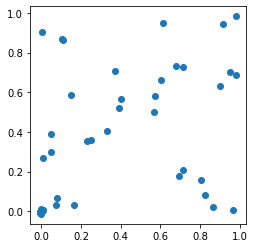

In [32]:
fig = plt.scatter(X[:,0], X[:,1])
fig.axes.set_aspect('equal')

In [33]:
X.shape

(100, 2)

## Plot H1 represnetative on 2D scatter plot

In [ ]:
import plotly
import plotly.graph_objects as go

# use bats to get pairwise distances
data = bats.DataSet(bats.Matrix(X)) # put into a bats.DataSet
dist = bats.L1Dist()  # distance we would like to use
pdist = dist(data, data) # returns a bats.Matrix of pairwise distances

pdist_np = np.array(pdist) # numpy array of pairwise distances

F = bats.RipsFiltration(pdist, np.inf, 2) # generate a filtraiton on pariwise distances
R = bats.reduce(F, bats.F2()) # reduce with F2 coefficients

# get longest H1 pair
ps1 = R.persistence_pairs(1)
lens = [p.death() - p.birth() for p in ps1] # find longest length pair
ind = np.argmax(lens)
pair = ps1[ind]

def plot_representative_2D(X, F, R, pair, D, thresh=None, **kwargs):
    """
    Plot H1 represnetative on 2D scatter plot

    plot representative
    X: 2-dimensional locations of points
    F: bats FilteredSimplicialComplex
    R: bats ReducedFilteredChainComplex
    pair: bats PersistencePair
    D: N x N distance matrix
    thresh: threshold parameter
    kwargs: passed onto figure layout
    """
    if thresh is None:
        thresh = pair.birth()

    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=X[:,0], y=X[:,1],
        mode='markers',
    ))
    edge_x = []
    edge_y = []
    N = X.shape[0]
    for i in range(N):
        for j in range(N):
            if D[i, j] <= thresh:
                edge_x.extend([X[i,0], X[j,0], None])
                edge_y.extend([X[i,1], X[j,1], None])

    fig.add_trace(go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')
     )

    edge_x = []
    edge_y = []
    r = R.representative(pair)
    nzind = r.nzinds()
    cpx = F.complex()
    for k in nzind:
        [i, j] = cpx.get_simplex(1, k)
        if D[i, j] <= thresh:
            edge_x.extend([X[i,0], X[j,0], None])
            edge_y.extend([X[i,1], X[j,1], None])
    fig.add_trace(go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=2, color='red'),
        hoverinfo='none',
        mode='lines')
     )
    fig.update_layout(**kwargs)
    return fig


fig = plot_representative_2D(X, F, R, pair, pdist_np, width=800, height=800)

In [ ]:
fig.show()